<a href="https://colab.research.google.com/github/filipesartori/Visao-Computacional/blob/main/Transfer%C3%AAncia_de_Estilo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
tf.__version__

'2.7.0'

In [ ]:
network = tf.keras.applications.VGG19(include_top=False, weights='imagenet')

In [ ]:
network.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [ ]:
len(network.layers)

22

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


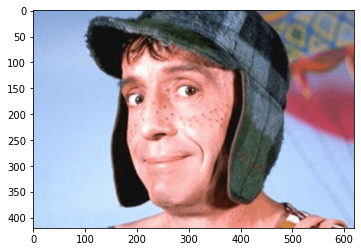

In [ ]:
imagem_conteudo = tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/Cursos/Imagens estilo/20190112-chaves.png')
plt.imshow(imagem_conteudo);

In [ ]:
imagem_conteudo = tf.keras.preprocessing.image.img_to_array(imagem_conteudo)

In [ ]:
type(imagem_conteudo)

numpy.ndarray

In [ ]:
imagem_conteudo.shape

(420, 620, 3)

In [ ]:
imagem_conteudo.min(), imagem_conteudo.max()

(1.0, 254.0)

In [ ]:
imagem_conteudo = imagem_conteudo / 255

In [ ]:
imagem_conteudo.min(), imagem_conteudo.max()

(0.003921569, 0.99607843)

In [ ]:
imagem_conteudo = imagem_conteudo[tf.newaxis, :]
imagem_conteudo.shape

(1, 420, 620, 3)

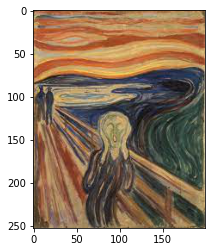

In [ ]:
imagem_estilo = tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/Cursos/Imagens estilo/download.jpg')
plt.imshow(imagem_estilo)

In [ ]:
imagem_estilo = tf.keras.preprocessing.image.img_to_array(imagem_estilo)

In [ ]:
imagem_estilo.min(), imagem_estilo.max()

(0.0, 255.0)

In [ ]:
imagem_estilo = imagem_estilo / 255
imagem_estilo = imagem_estilo[tf.newaxis, :]
imagem_estilo.shape

(1, 253, 200, 3)

In [ ]:
camadas_conteudo = ['block4_conv2']
camadas_estilo = ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1', 'block5_conv1'] 

In [ ]:
numero_camadas_conteudo = len(camadas_conteudo)
numero_camadas_estilo = len(camadas_estilo)

In [ ]:
def vgg_camadas(nome_camadas):
  vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')
  vgg.treinable = False
  outputs = [vgg.get_layer(nome).output for nome in nome_camadas]
  network = tf.keras.Model(inputs = [vgg.input], outputs = outputs)
  return network

In [ ]:
extrator_estilo = vgg_camadas(camadas_estilo)

In [ ]:
extrator_estilo.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0   

In [ ]:
extrator_estilo.outputs

[<KerasTensor: shape=(None, None, None, 64) dtype=float32 (created by layer 'block1_conv1')>,
 <KerasTensor: shape=(None, None, None, 128) dtype=float32 (created by layer 'block2_conv1')>,
 <KerasTensor: shape=(None, None, None, 256) dtype=float32 (created by layer 'block3_conv1')>,
 <KerasTensor: shape=(None, None, None, 512) dtype=float32 (created by layer 'block4_conv1')>,
 <KerasTensor: shape=(None, None, None, 512) dtype=float32 (created by layer 'block5_conv1')>]

In [ ]:
saidas_estilo = extrator_estilo(imagem_estilo)

In [ ]:
len(saidas_estilo)

5

In [ ]:
saidas_estilo[0]

<tf.Tensor: shape=(1, 253, 200, 64), dtype=float32, numpy=
array([[[[0.        , 0.32410067, 0.24642608, ..., 0.65011024,
          0.80348414, 0.6078742 ],
         [0.        , 0.4047248 , 0.400356  , ..., 0.34069145,
          1.3180742 , 1.0815489 ],
         [0.        , 0.39830923, 0.33861044, ..., 0.414594  ,
          1.109062  , 0.86320573],
         ...,
         [0.17132878, 0.4083255 , 0.40263352, ..., 0.44972777,
          1.3302671 , 1.1128211 ],
         [0.        , 0.3527607 , 0.27740994, ..., 0.4994703 ,
          1.0349417 , 0.75145376],
         [0.66534674, 0.3445896 , 0.39929473, ..., 0.7604981 ,
          1.4234079 , 1.2915492 ]],

        [[0.32155865, 0.40646166, 0.17749129, ..., 0.3420089 ,
          0.05683532, 0.10481212],
         [0.772209  , 0.5037971 , 0.2903245 , ..., 0.        ,
          0.4043202 , 0.35803387],
         [0.3379935 , 0.529136  , 0.25616196, ..., 0.        ,
          0.33849624, 0.21477947],
         ...,
         [1.035959  , 0.51396

In [ ]:
def gram_matrix(ativacoes):
  resultado = tf.linalg.einsum('bijc,bijd->bcd', ativacoes, ativacoes)
  input_shape = tf.shape(ativacoes)
  num_locations = tf.cast(input_shape[1] * input_shape[2], tf.float32)
  return resultado / num_locations

In [ ]:
saidas_estilo[0]

<tf.Tensor: shape=(1, 253, 200, 64), dtype=float32, numpy=
array([[[[0.        , 0.32410067, 0.24642608, ..., 0.65011024,
          0.80348414, 0.6078742 ],
         [0.        , 0.4047248 , 0.400356  , ..., 0.34069145,
          1.3180742 , 1.0815489 ],
         [0.        , 0.39830923, 0.33861044, ..., 0.414594  ,
          1.109062  , 0.86320573],
         ...,
         [0.17132878, 0.4083255 , 0.40263352, ..., 0.44972777,
          1.3302671 , 1.1128211 ],
         [0.        , 0.3527607 , 0.27740994, ..., 0.4994703 ,
          1.0349417 , 0.75145376],
         [0.66534674, 0.3445896 , 0.39929473, ..., 0.7604981 ,
          1.4234079 , 1.2915492 ]],

        [[0.32155865, 0.40646166, 0.17749129, ..., 0.3420089 ,
          0.05683532, 0.10481212],
         [0.772209  , 0.5037971 , 0.2903245 , ..., 0.        ,
          0.4043202 , 0.35803387],
         [0.3379935 , 0.529136  , 0.25616196, ..., 0.        ,
          0.33849624, 0.21477947],
         ...,
         [1.035959  , 0.51396

In [ ]:
gram_matrix(saidas_estilo[0])

<tf.Tensor: shape=(1, 64, 64), dtype=float32, numpy=
array([[[0.6191071 , 0.3349473 , 0.2457029 , ..., 0.13131303,
         0.3649653 , 0.40339392],
        [0.3349473 , 0.2535864 , 0.17171036, ..., 0.03830256,
         0.22437733, 0.23635511],
        [0.2457029 , 0.17171036, 0.12275972, ..., 0.03251867,
         0.16832903, 0.1795166 ],
        ...,
        [0.13131303, 0.03830256, 0.03251867, ..., 0.08098035,
         0.08679271, 0.08673622],
        [0.3649653 , 0.22437733, 0.16832903, ..., 0.08679271,
         0.28623182, 0.29054472],
        [0.40339392, 0.23635511, 0.1795166 , ..., 0.08673622,
         0.29054472, 0.3062159 ]]], dtype=float32)>

In [ ]:
class StyleContentModel(tf.keras.models.Model):
  def __init__(self, camadas_estilo, camadas_conteudo):
    super().__init__()
    self.vgg = vgg_camadas(camadas_estilo + camadas_conteudo)
    self.camadas_estilo = camadas_estilo
    self.camadas_conteudo = camadas_conteudo
    self.numero_camadas_estilo = len(camadas_estilo)
    self.vgg.trainable = False

  def call(self, imagem):
    imagem = imagem * 255.0
    imagem_preprocessada = tf.keras.applications.vgg19.preprocess_input(imagem)
    outputs = self.vgg(imagem_preprocessada)
    saidas_estilo = outputs[:self.numero_camadas_estilo] 
    saidas_conteudo = outputs[self.numero_camadas_estilo:] 

    saidas_estilo = [gram_matrix(camada) for camada in saidas_estilo]

    conteudo_dict = {nome_conteudo: valor for nome_conteudo, valor in zip(self.camadas_conteudo, saidas_conteudo)}
    estilo_dict = {nome_estilo: valor for nome_estilo, valor in zip(self.camadas_estilo, saidas_estilo)}

    return {'conteudo': conteudo_dict, 'estilo': estilo_dict}

In [ ]:
extrator = StyleContentModel(camadas_estilo, camadas_conteudo)

In [ ]:
resultados = extrator(imagem_conteudo)

In [ ]:
resultados

{'conteudo': {'block4_conv2': <tf.Tensor: shape=(1, 52, 77, 512), dtype=float32, numpy=
  array([[[[   0.      ,    0.      ,    0.      , ...,  587.59735 ,
              98.26839 ,    0.      ],
           [   0.      ,    0.      ,    0.      , ...,  275.1089  ,
               0.      ,    0.      ],
           [   0.      ,    0.      ,   21.139656, ...,  173.9219  ,
              35.28246 ,    0.      ],
           ...,
           [ 338.55966 ,    0.      ,    0.      , ..., 1608.4706  ,
              71.281296,  226.0726  ],
           [  73.2242  ,    0.      ,    0.      , ..., 1125.8146  ,
             266.82275 ,  271.8676  ],
           [ 121.475006,    0.      ,    0.      , ...,  607.07965 ,
             382.96228 , 1145.4486  ]],
  
          [[   0.      ,    0.      ,    0.      , ...,  762.7896  ,
               0.      ,    0.      ],
           [   0.      ,    0.      ,    0.      , ...,  419.5773  ,
               0.      ,    0.      ],
           [   0.      ,    

In [ ]:
for chave, valor in resultados.items():
  print(chave, valor.keys())

conteudo dict_keys(['block4_conv2'])
estilo dict_keys(['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1', 'block5_conv1'])


In [ ]:
estilo_objetivo = extrator(imagem_estilo)['estilo']
conteudo_objetivo = extrator(imagem_conteudo)['conteudo']

In [ ]:
len(estilo_objetivo), len(conteudo_objetivo)

(5, 1)

In [ ]:
nova_imagem = tf.Variable(imagem_conteudo)

In [ ]:
peso_conteudo = 1
peso_estilo = 100

In [ ]:
optimizer = tf.optimizers.Adam(learning_rate=0.02)

In [ ]:
from sklearn.metrics import mean_squared_error

Época:  500  Conteúdo loss:  tf.Tensor(475583.78, shape=(), dtype=float32)  Estilo loss:  tf.Tensor(143503020.0, shape=(), dtype=float32)  Total loss:  tf.Tensor(287481630.0, shape=(), dtype=float32)


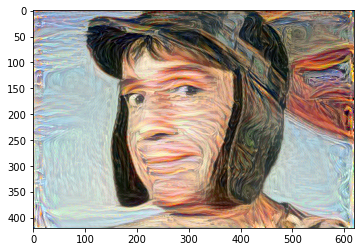

Época:  1000  Conteúdo loss:  tf.Tensor(495304.38, shape=(), dtype=float32)  Estilo loss:  tf.Tensor(86774296.0, shape=(), dtype=float32)  Total loss:  tf.Tensor(174043900.0, shape=(), dtype=float32)


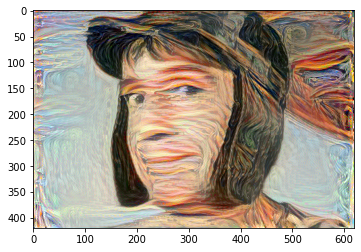

Época:  1500  Conteúdo loss:  tf.Tensor(507034.9, shape=(), dtype=float32)  Estilo loss:  tf.Tensor(93463660.0, shape=(), dtype=float32)  Total loss:  tf.Tensor(187434370.0, shape=(), dtype=float32)


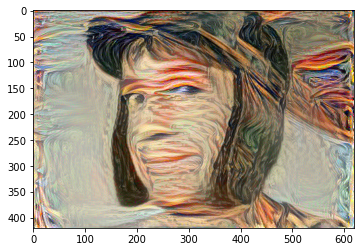

Época:  2000  Conteúdo loss:  tf.Tensor(510827.22, shape=(), dtype=float32)  Estilo loss:  tf.Tensor(170503060.0, shape=(), dtype=float32)  Total loss:  tf.Tensor(341516930.0, shape=(), dtype=float32)


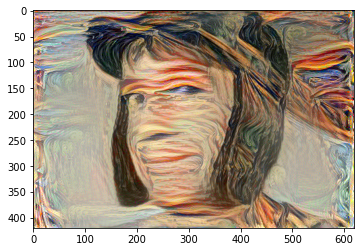

Época:  2500  Conteúdo loss:  tf.Tensor(524121.56, shape=(), dtype=float32)  Estilo loss:  tf.Tensor(108871220.0, shape=(), dtype=float32)  Total loss:  tf.Tensor(218266560.0, shape=(), dtype=float32)


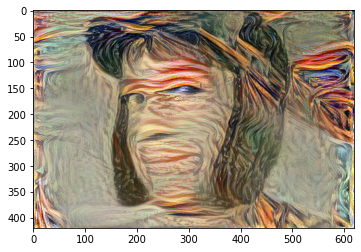

Época:  3000  Conteúdo loss:  tf.Tensor(529954.7, shape=(), dtype=float32)  Estilo loss:  tf.Tensor(50749690.0, shape=(), dtype=float32)  Total loss:  tf.Tensor(102029330.0, shape=(), dtype=float32)


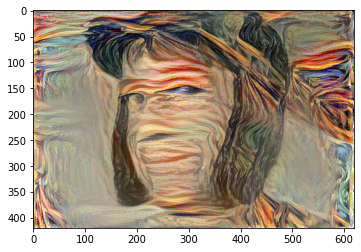

In [ ]:
epocas = 3000
impressao = 500

for epoca in range(epocas):
  with tf.GradientTape() as tape:
    outputs = extrator(nova_imagem)

    saidas_conteudo = outputs['conteudo']
    saidas_estilo = outputs['estilo']

    conteudo_loss = tf.add_n([tf.reduce_mean((saidas_conteudo[nome] - conteudo_objetivo[nome]) ** 2) for nome in saidas_conteudo.keys()])
    estilo_loss = tf.add_n([tf.reduce_mean((saidas_estilo[nome] - estilo_objetivo[nome]) ** 2) for nome in saidas_estilo.keys()])
    total_loss = conteudo_loss * peso_conteudo / numero_camadas_conteudo + estilo_loss * peso_estilo / numero_camadas_estilo

  gradiente = tape.gradient(total_loss, nova_imagem)
  optimizer.apply_gradients([(gradiente, nova_imagem)])
  nova_imagem.assign(tf.clip_by_value(nova_imagem, 0.0, 1.0))

  if (epoca + 1) % impressao == 0:
    print('Época: ', epoca + 1, ' Conteúdo loss: ', conteudo_loss, ' Estilo loss: ', estilo_loss, ' Total loss: ', total_loss)
    plt.imshow(tf.squeeze(nova_imagem, axis=0));
    plt.show()

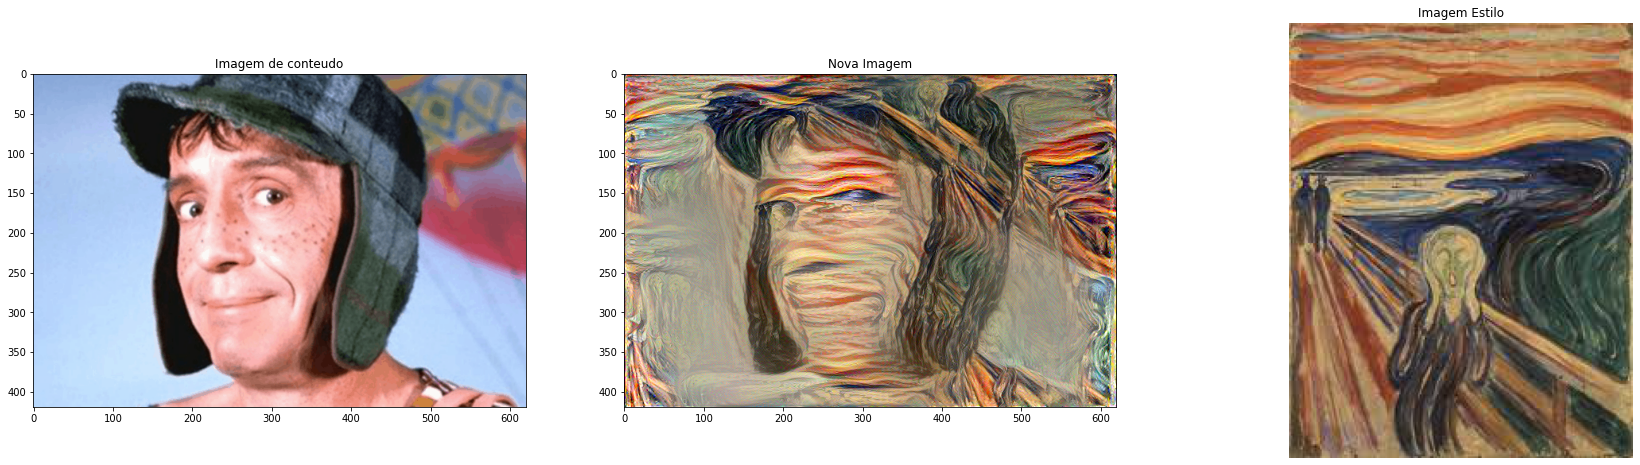

In [ ]:
figura, (eixo1, eixo2, eixo3) = plt.subplots(1, 3, figsize =(30, 8))
eixo1.imshow(tf.squeeze(imagem_conteudo, axis = 0))
eixo1.set_title('Imagem de conteudo')
plt.axis('off')
eixo2.imshow(tf.squeeze(nova_imagem, axis = 0))
eixo2.set_title('Nova Imagem')
plt.axis('off')
eixo3.imshow(tf.squeeze(imagem_estilo, axis = 0))
eixo3.set_title('Imagem Estilo')
plt.axis('off');